In [168]:
import numpy as np

In [169]:
f = [2,3,5,1,4,6,3,2,5]
g = [1/3, 1/3, 1/3]
print(f)
print(g)

[2, 3, 5, 1, 4, 6, 3, 2, 5]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [170]:
# 离散序列的卷积运算
print(np.convolve(f,g, mode='valid'))

[3.33333333 3.         3.33333333 3.66666667 4.33333333 3.66666667
 3.33333333]


# 卷积层的定义和应用测试

In [171]:
import torch
import matplotlib.pyplot as plt

In [172]:
# 1. 读取图片
img = plt.imread("../data/duck.jpg")
print(img.shape)

(1080, 1080, 3)


In [173]:
# 2. 将图片数据调整为卷积层输入特征图对应的形状
input = torch.tensor(img).permute(2,0,1).float()
print("输入特征图的形状：", input.shape)

输入特征图的形状： torch.Size([3, 1080, 1080])


In [174]:
# 3. 定义卷积层
conv = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=9, stride=3, padding=0, bias=False)

In [175]:
# print(conv.weight)
# print(conv.weight.shape)
conv.weight = torch.nn.Parameter(
    torch.tensor([[[[ 5.9354e-02,  4.5042e-02, -4.5072e-02, -1.7440e-02, -1.4293e-02,
            4.3583e-02, -2.9326e-02, -5.0150e-02,  3.8225e-02],
          [ 1.4133e-03,  2.5856e-02, -3.0834e-02, -5.0751e-02, -1.7951e-02,
           -4.0033e-02, -1.4850e-02, -1.5574e-02, -1.0623e-02],
          [-2.6842e-02,  2.7346e-02, -1.9191e-02, -7.6132e-03, -1.2805e-02,
            3.9230e-02,  2.5335e-02, -4.6356e-03,  5.1431e-02],
          [ 5.2372e-02, -9.9977e-03, -5.8733e-02, -5.4616e-02, -1.3899e-02,
           -1.2299e-02,  6.1572e-02,  5.0701e-02,  6.2258e-02],
          [-7.9379e-03, -1.1336e-03,  4.3496e-02,  3.7088e-02, -4.6789e-02,
            3.5726e-02, -1.4839e-02,  8.3102e-03, -1.1467e-02],
          [ 4.5922e-02,  4.8580e-02,  3.5789e-02,  4.2298e-02,  5.4512e-02,
           -5.8886e-03, -4.0783e-02, -9.5512e-03, -1.1298e-02],
          [-5.7732e-02, -2.7834e-02, -5.5310e-02,  5.7494e-02,  2.7046e-02,
           -3.6574e-03,  3.2927e-03, -5.3267e-02, -1.2611e-03],
          [-1.4259e-02,  1.4218e-02,  6.9000e-05,  3.7154e-03, -3.3170e-02,
            1.4185e-02,  4.8206e-02, -4.8133e-02, -5.1955e-02],
          [-9.4450e-03, -5.8737e-02, -1.0595e-02,  4.0698e-02,  4.3483e-02,
           -3.5364e-02, -2.0574e-02,  5.3127e-02,  7.3946e-03]],

         [[ 6.4148e-02,  3.2959e-02,  5.6162e-02, -2.2941e-02, -1.1542e-02,
            1.6493e-02, -4.5734e-02, -2.3218e-02, -2.6541e-02],
          [ 4.4289e-02, -4.8512e-02,  4.0232e-02,  2.6970e-02, -6.0832e-02,
           -5.3894e-02, -2.8200e-02, -5.4491e-03,  4.8452e-02],
          [-5.9272e-02, -3.1272e-02, -3.6631e-02, -5.3265e-02,  6.1803e-02,
           -4.9249e-02,  6.7954e-04, -1.3703e-03,  1.6155e-02],
          [ 5.7585e-02, -6.1163e-03,  5.7529e-02, -1.9636e-02, -4.0540e-02,
            9.8908e-03,  5.1798e-02, -3.1014e-02,  4.0197e-02],
          [ 4.1969e-02, -6.8819e-03,  7.8715e-03, -3.3532e-02, -2.2383e-02,
           -3.9098e-02,  6.0820e-02,  1.2822e-02,  2.5017e-02],
          [ 2.8034e-02, -6.0170e-02,  2.9169e-02, -2.8959e-03,  1.6674e-02,
            2.1156e-02,  2.7645e-02, -4.3292e-02, -5.0092e-02],
          [-9.8733e-04,  5.1502e-02,  2.8092e-02,  6.3841e-02,  3.6982e-02,
           -9.6610e-03,  8.3194e-03, -2.6242e-02, -4.6048e-02],
          [ 3.1341e-02,  3.2679e-02,  6.2013e-02,  5.4367e-02,  1.7762e-02,
            2.0285e-02, -3.5587e-02,  5.1575e-02, -5.5581e-02],
          [-4.4743e-02,  4.5458e-02, -7.2530e-03,  5.4999e-02, -5.4879e-02,
           -2.8685e-02, -4.7947e-02,  5.4009e-02, -3.9188e-02]],

         [[-2.8877e-03,  5.1290e-02,  5.3316e-02, -2.9376e-02, -3.6199e-02,
           -2.8435e-02, -3.9409e-02, -3.0982e-02, -5.6458e-02],
          [ 2.5056e-02,  5.7640e-02, -5.9701e-02,  3.2088e-02, -3.7895e-02,
            5.3500e-02,  5.2138e-02,  5.3967e-02,  4.8149e-02],
          [ 5.3789e-02,  5.9352e-02, -4.8570e-02,  3.0431e-02,  1.1807e-02,
           -3.2827e-02, -5.3977e-02,  5.2685e-03, -2.5138e-02],
          [ 1.2164e-02, -3.6583e-03, -3.8591e-02,  1.7853e-02,  3.4986e-02,
           -3.6892e-02,  8.1099e-03,  5.0177e-03, -1.5287e-02],
          [ 1.6528e-02, -9.6898e-03, -4.8629e-02, -1.5640e-02,  3.4661e-02,
           -5.4703e-03,  3.5400e-02,  9.4444e-03, -6.4141e-02],
          [-4.7613e-03, -3.8461e-02, -2.3823e-02, -2.2890e-02, -2.7909e-02,
            4.0056e-02,  2.5738e-02,  3.9193e-02,  5.7067e-02],
          [-3.1067e-02, -3.9326e-02,  4.7727e-02, -5.3246e-02, -4.6669e-02,
           -2.9802e-02,  5.9139e-02, -2.7936e-02, -3.2153e-02],
          [ 2.3967e-02,  4.0830e-02,  4.7833e-02, -2.6218e-02,  1.9815e-02,
           -2.2671e-02,  3.9939e-02,  2.0059e-02, -5.6044e-02],
          [ 2.9531e-02,  1.8170e-02, -4.6172e-02,  4.8510e-02,  2.1688e-02,
           -4.0851e-02,  5.6002e-02,  2.3736e-02, -3.8949e-02]]],


        [[[ 4.8216e-04, -1.2266e-02, -2.3879e-02,  2.4236e-02,  2.9607e-02,
            5.7242e-02,  1.8558e-02,  2.7020e-03,  6.6481e-03],
          [-4.9575e-02, -1.7786e-02, -2.0671e-02, -4.8585e-02,  1.0274e-04,
            4.9452e-02, -1.6072e-02, -4.0742e-02, -1.5242e-02],
          [-6.0084e-02,  4.5975e-02,  3.4796e-02, -5.0194e-04, -8.9575e-03,
            7.9275e-03,  4.6127e-02,  1.3980e-02,  4.2750e-02],
          [ 5.9452e-02, -5.6057e-02,  2.7020e-03,  5.0089e-02, -1.5229e-02,
           -3.3388e-02, -4.1913e-02, -9.0196e-03, -1.6531e-02],
          [ 3.7075e-02, -3.0834e-02,  2.5243e-02,  1.7029e-02,  4.1073e-02,
           -1.0285e-02,  2.0291e-02, -5.8496e-02, -5.5999e-02],
          [-1.2307e-02,  6.0974e-02,  2.1618e-02, -5.2740e-03, -4.0810e-02,
           -2.7720e-02,  3.7834e-02, -4.1581e-02, -6.1328e-02],
          [-3.0319e-02,  2.3964e-02,  2.3121e-02, -2.7420e-02,  1.7195e-02,
           -2.9232e-02,  4.6975e-02,  4.1488e-03, -3.5707e-02],
          [-9.1643e-03, -3.2285e-02, -1.3488e-02, -2.1201e-03,  6.1827e-02,
            1.2182e-02,  3.9618e-02,  4.1513e-02,  4.4919e-02],
          [-5.3571e-02, -2.8146e-02,  5.7043e-02, -1.4806e-02, -3.1178e-02,
            5.0608e-02, -2.1098e-02,  4.0457e-03, -5.3154e-02]],

         [[-4.2163e-02,  3.6682e-02,  1.2965e-02, -3.7481e-02, -3.1126e-03,
            1.1301e-02,  2.0864e-02,  4.3796e-03,  8.9092e-03],
          [ 4.6301e-02,  8.9369e-03, -3.5468e-03, -6.0491e-02, -2.0441e-02,
           -3.5124e-02,  1.7948e-02,  2.9427e-02, -4.1179e-02],
          [ 6.1353e-02, -4.7970e-02, -2.6620e-02, -5.9499e-02, -3.5874e-02,
            4.3570e-02,  6.2722e-02,  6.0935e-02, -3.2370e-02],
          [ 2.0155e-02, -6.2397e-02,  2.0866e-02, -5.6067e-02, -4.6162e-03,
           -3.8538e-03,  4.6818e-02,  1.0484e-02, -5.4361e-02],
          [ 4.8961e-02,  3.3040e-02,  3.6526e-02,  6.2720e-02, -3.6455e-02,
            1.7986e-02, -3.1612e-02, -4.2906e-02,  5.2328e-02],
          [ 9.4930e-03,  5.1665e-02, -2.4198e-02, -5.0017e-02,  7.7277e-03,
            4.4560e-02,  2.2162e-04, -1.2915e-02,  5.5872e-02],
          [ 3.4114e-02, -3.3400e-02,  4.8733e-02, -6.4014e-02,  1.7282e-02,
           -6.0441e-02,  6.0945e-02,  5.6908e-02, -2.1596e-02],
          [-4.6499e-02, -3.4173e-02,  2.9971e-03,  4.5140e-02,  4.1499e-02,
            5.4523e-02,  2.9169e-02,  6.3788e-02,  5.3316e-02],
          [-4.6796e-03, -1.8973e-04,  4.8730e-02, -6.2519e-02, -2.5818e-02,
            2.8021e-02,  6.3970e-02,  5.4045e-03, -3.4221e-02]],

         [[ 9.7953e-03, -1.6690e-02, -3.3572e-02, -4.9748e-02,  4.3972e-02,
            4.6288e-02, -6.3652e-03, -5.7292e-02, -1.1379e-02],
          [-1.6590e-02, -4.0982e-02,  2.7143e-02, -2.6308e-02,  3.1437e-02,
           -1.7205e-02,  4.3798e-02,  1.7651e-02, -9.7778e-04],
          [-4.3979e-02, -4.3291e-02, -1.0629e-02, -2.6567e-02,  6.0248e-03,
           -5.9140e-02, -1.4302e-03, -2.8651e-02,  6.2242e-02],
          [ 6.8690e-03,  5.2360e-02,  4.7475e-02, -5.6169e-02, -4.9497e-02,
           -1.8867e-03, -4.7593e-03, -2.0320e-02,  4.3203e-02],
          [ 1.1524e-02, -4.5255e-03,  7.4230e-03, -1.5128e-02,  4.7025e-02,
           -4.6223e-02,  1.9707e-02,  6.1391e-02,  5.1431e-02],
          [ 2.8573e-03, -4.6783e-02,  4.5435e-02, -2.6983e-02, -3.7010e-02,
           -2.2376e-02, -6.4924e-03, -5.1702e-02, -3.1538e-02],
          [ 5.3742e-02,  3.7710e-02, -4.8439e-02,  5.6196e-02, -7.4159e-04,
           -4.8321e-02,  3.2879e-02,  2.5105e-02,  5.3184e-02],
          [ 4.6739e-02,  2.1331e-03,  5.7811e-02,  6.3938e-02, -1.4076e-02,
           -4.6002e-02,  8.4354e-03,  3.6826e-02, -5.2674e-03],
          [-3.4115e-02,  4.9598e-03, -1.7412e-02,  4.0619e-02,  3.9456e-02,
            3.7802e-02, -3.7794e-02,  1.0532e-02,  3.6205e-02]]],


        [[[-4.2493e-02,  5.0291e-02, -5.6537e-03, -2.2664e-02,  3.3724e-02,
            7.4378e-03,  4.8030e-02,  5.6984e-02,  2.3574e-02],
          [ 1.5223e-02, -5.0841e-02,  2.7241e-02,  5.9712e-02,  2.3814e-02,
            1.6510e-05, -4.0395e-03,  1.4341e-02,  3.9542e-02],
          [ 5.1069e-02,  4.5829e-02, -1.4324e-02, -6.8066e-03, -1.1468e-02,
           -3.5924e-02, -2.4092e-02, -5.6578e-02, -6.3035e-02],
          [-4.7056e-02,  4.2891e-02, -3.0624e-03, -4.2294e-02, -7.4960e-03,
            1.4957e-02, -3.0671e-02, -3.7724e-02,  5.1953e-02],
          [ 5.3736e-02,  1.4656e-02, -9.0351e-03, -6.7297e-03, -2.0434e-02,
           -1.7872e-02,  4.7900e-02,  6.2841e-02, -1.0081e-02],
          [ 5.9332e-02, -7.3192e-04, -4.9227e-02,  2.2584e-03, -2.7375e-02,
           -1.0461e-02,  6.1836e-02,  2.5901e-02,  5.6545e-02],
          [ 1.3466e-02,  3.8756e-02,  2.4884e-02,  2.2993e-02,  4.2362e-02,
           -2.1729e-03,  5.5473e-02,  4.0096e-02, -1.1996e-02],
          [-4.3104e-02,  2.7024e-02, -5.8685e-02, -3.5490e-02, -4.5460e-02,
           -3.5978e-02, -4.0468e-02,  3.1867e-02,  3.0418e-02],
          [-2.3960e-02, -4.7416e-02, -4.0077e-02, -3.3799e-02,  2.1361e-02,
           -2.7666e-02, -1.8011e-02, -6.4080e-03, -5.4208e-02]],

         [[-5.9602e-02,  2.9881e-02, -3.5410e-02, -4.2398e-02, -3.6697e-03,
            4.5470e-02,  2.6840e-02, -8.9195e-03, -5.6739e-02],
          [ 6.3770e-02,  5.5614e-02, -3.3316e-02,  5.7447e-02,  6.3161e-02,
            1.7225e-02,  2.4002e-02,  8.4091e-04, -3.6293e-02],
          [-1.5498e-02, -1.8935e-02, -3.7274e-03, -1.5906e-02, -5.5090e-02,
            6.2296e-02,  5.8614e-02,  2.5557e-02, -4.2114e-02],
          [ 5.0947e-02, -2.6628e-02, -1.6466e-02,  1.9677e-02,  9.1096e-03,
           -6.0907e-02,  2.3099e-02, -7.7734e-04,  7.3133e-03],
          [ 4.8001e-03, -3.2842e-03, -5.1896e-02,  4.3538e-02,  2.4262e-02,
            2.1535e-02,  5.6098e-03,  4.2437e-02, -2.7291e-02],
          [ 6.7869e-03,  6.2264e-02, -9.2417e-03,  4.2412e-02, -4.0063e-02,
            4.7108e-02, -6.1345e-02,  6.6753e-03,  6.1671e-02],
          [ 4.0821e-02,  5.1661e-02,  5.8213e-02, -1.0103e-02,  6.2359e-03,
           -3.7173e-02, -3.4335e-02, -6.3436e-02, -1.5279e-02],
          [-4.0283e-02,  6.3347e-02,  6.5987e-03, -4.6402e-03, -6.1007e-02,
           -4.4880e-03,  2.9379e-02, -1.7224e-02,  4.4594e-03],
          [-3.8466e-02,  4.7574e-02,  2.4881e-03,  2.7893e-02, -2.3063e-02,
           -3.9882e-02,  4.8007e-02, -6.3729e-02, -1.3140e-02]],

         [[-1.6573e-02,  4.8886e-03,  2.4058e-02, -2.0807e-02,  2.8107e-02,
            2.8098e-02,  9.5315e-03,  9.1329e-03, -6.2317e-02],
          [-2.4169e-02,  2.4480e-02, -5.5531e-02,  1.4847e-02, -5.7617e-02,
            2.1623e-02, -3.0629e-02,  4.6790e-02, -3.8438e-02],
          [-8.1748e-03,  1.0561e-02,  3.5187e-02, -2.5488e-02, -4.2812e-02,
            5.9246e-02,  6.3884e-02, -3.6504e-02, -1.7356e-02],
          [ 5.3402e-02, -2.3261e-03,  5.0109e-03,  1.3102e-02, -1.0056e-02,
            2.0363e-02, -3.2977e-02, -6.0886e-02, -4.7350e-03],
          [ 5.9749e-02, -2.1848e-02, -6.2366e-02, -2.7113e-02,  1.5035e-02,
           -5.9978e-02, -3.0945e-02,  1.1342e-02,  3.9182e-02],
          [-8.9864e-03,  6.2484e-02,  1.6970e-02, -1.0818e-02,  7.0863e-03,
            1.2765e-02, -1.8221e-02, -2.2212e-03,  4.2300e-02],
          [ 5.0206e-02,  2.3164e-02, -9.3288e-03,  5.0163e-02,  6.4004e-02,
           -3.9030e-02, -1.5139e-02, -3.1137e-02, -4.9740e-02],
          [-4.8158e-02, -4.5599e-02, -2.2628e-02, -3.9789e-02, -4.9334e-02,
            9.8234e-03,  6.7896e-04, -3.3288e-02,  1.4426e-02],
          [ 7.3072e-03,  1.9218e-02,  2.6711e-02, -4.9577e-02,  2.4736e-02,
            2.6274e-03, -2.7971e-03,  1.4291e-02, -5.6019e-02]]]],
       requires_grad=True))

In [176]:
# 4. 前向传播，将卷积层应用到输入特征图上
output = conv(input)
print("输出特征图的形状：", output.shape)

输出特征图的形状： torch.Size([3, 358, 358])


In [177]:
# 5. 将输出特征图转换为图片数据
output = torch.clamp(output.int(), 0, 255)
output = output.permute(1,2,0).detach().numpy()
print(output.shape)

(358, 358, 3)


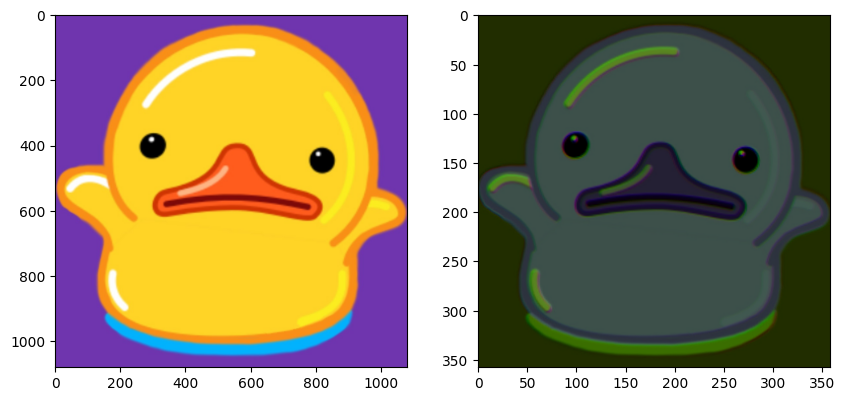

In [178]:
# 显示图片，进行对比
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()